In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('2019-10-24 SAP Work Order & Notification Report.xlsx',sheet_name='INFO')

In [3]:
df.head()

,Maintenance Plan,Equipment,Manual/ Auto,Order,Notification,Header text:,Created on,Sort field,Description of Technical Object,Description,...,ABC indicator,User Status,System status,Priority,Estimated costs,Total planned costs,Total actual costs,Basic start date,Basic finish date,MaintActivityType
0,BL1000001170,BL000000005-10-035,AUTO,913195093,713335025.0,* 09/19/2016 19:04:48 rick kessler (FNP_050408...,2016-09-19,005-10-035 FRCD DRFT FA,FORCED DRAFT FAN,"15-002600-000, Remove valve and free up",...,E,COMP,CLSD DLFL NCMP NMAT PRC SKKP,4,NaN,NaN,NaN,NaT,NaT,NaN
1,Not Planned,BL000000101-12-206,MANUAL,913195171,713335093.0,* 09/19/2016 19:13:49 rick kessler (FNP_050408...,2016-09-19,101-12-206 LN 2 PLLTIZE,LINE 2 PELLETIZER,"16-001987-000, 101-12-206 LINE 2 PELLETI",...,E,COMP,CLSD ESTC NCMP NMAT PRC SKKP,3,NaN,NaN,NaN,NaT,NaT,NaN
2,Not Planned,BL000000104-09-851,MANUAL,913195174,713335096.0,* 09/19/2016 19:14:44 rick kessler (FNP_050408...,2016-09-19,104-09-851 FC1 POLY,"PUMP, FLASH CHAMBER 1 POLYMER","16-002676-000, 104-09-851 FC1 POLY, Insp",...,E,COMP,CLSD DLFL NCMP NMAT PRC,4,NaN,NaN,NaN,NaT,NaT,NaN
3,Not Planned,BL000000154-12-730,MANUAL,913195175,713335097.0,* 09/19/2016 19:14:57 rick kessler (FNP_050408...,2016-09-19,154-12-730 BD EXTRUDER,BD EXTRUDER,"16-002683-000, 154-12-730 BD EXTRUDER, I",...,E,COMP,CLSD ESTC MSCP NMAT PRC SETC SKKP,3,NaN,NaN,NaN,NaT,NaT,NaN
4,BL1000001170,BL000000101-12-206,AUTO,913195180,713335112.0,* 09/19/2016 19:16:05 rick kessler (FNP_050408...,2016-09-19,101-12-206 LN 2 PLLTIZE,LINE 2 PELLETIZER,"16-002984-000, 101-12-206 LINE 2 PELLETI",...,E,COMP,CLSD ESTC MSCP NMAT PRC SETC SKKP,3,NaN,NaN,NaN,NaT,NaT,NaN


In [4]:
# cerate datetime index around the created on date
# refer to 01 Keras regression 
# find the amount of manual maintenances per year 
# normalize the data around point that sees data even out (data for maintenances is slow at first but then normalizes)
# manual maintenacnes per month --- this makes more sense ---
# manual maintenances per year

In [4]:
df['Month'] = df['Created on'].apply(lambda x: x.month)
df['Year'] = df['Created on'].apply(lambda x: x.year)
df.head(1)

,Maintenance Plan,Equipment,Manual/ Auto,Order,Notification,Header text:,Created on,Sort field,Description of Technical Object,Description,...,System status,Priority,Estimated costs,Total planned costs,Total actual costs,Basic start date,Basic finish date,MaintActivityType,Month,Year
0,BL1000001170,BL000000005-10-035,AUTO,913195093,713335025.0,* 09/19/2016 19:04:48 rick kessler (FNP_050408...,2016-09-19,005-10-035 FRCD DRFT FA,FORCED DRAFT FAN,"15-002600-000, Remove valve and free up",...,CLSD DLFL NCMP NMAT PRC SKKP,4,NaN,NaN,NaN,NaT,NaT,NaN,9,2016


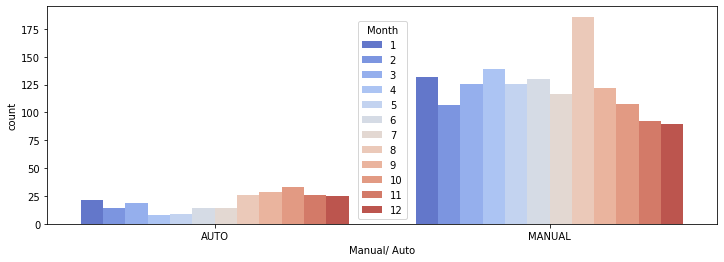

In [5]:
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df,hue='Month',palette='coolwarm')

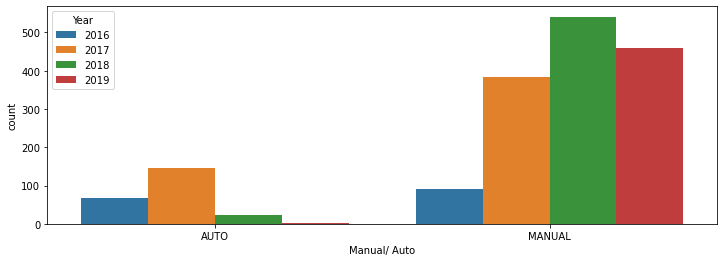

In [6]:
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df,hue='Year')

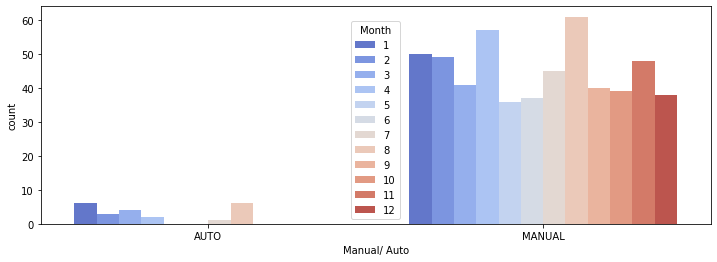

In [7]:
#2018 == the year with the most manual maintenances
df2018 = df[df['Year']==2018]
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df2018,hue='Month',palette='coolwarm')

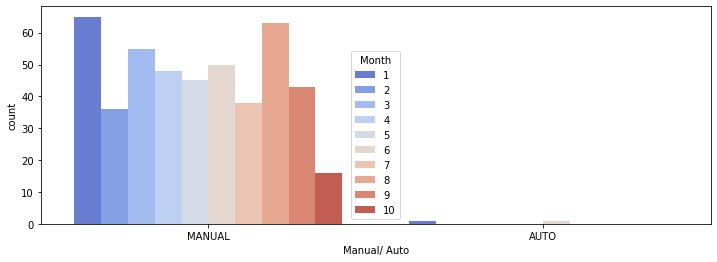

In [8]:
df2019 = df[df['Year']==2019]
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df2019,hue='Month',palette='coolwarm')

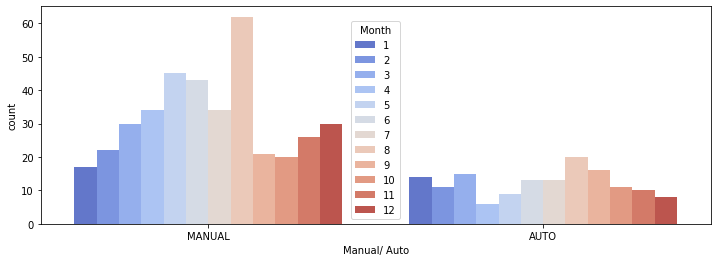

In [9]:
df2017 = df[df['Year']==2017]
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df2017,hue='Month',palette='coolwarm')

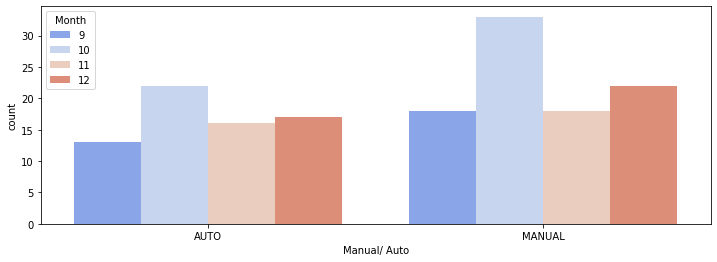

In [10]:
df2016 = df[df['Year']==2016]
plt.figure(figsize=(12,4))
sns.countplot(x='Manual/ Auto',data=df2016,hue='Month',palette='coolwarm')

In [23]:
#seems to have a consistent spike during month 8 every year

In [34]:
from tensorflow.keras.utils import to_categorical

In [41]:
arr = np.array(df['Manual/ Auto'].values.tolist())
arr = arr.astype('str')
to_categorical(arr, 2)

ValueError: invalid literal for int() with base 10: 'AUTO'

In [12]:
#IGNORE FOR NOW
df.corr()

,Order,Notification,Priority,Estimated costs,Total planned costs,Total actual costs,Month,Year
Order,1.000000,0.537734,0.297263,0.017752,0.012438,-0.102155,-0.095224,0.541879
Notification,0.537734,1.000000,0.349305,-0.081592,-0.057878,-0.132824,0.036048,0.103279
Priority,0.297263,0.349305,1.000000,NaN,NaN,NaN,0.040567,0.002233
Estimated costs,0.017752,-0.081592,NaN,1.000000,0.796814,0.628916,-0.174541,0.162119
Total planned costs,0.012438,-0.057878,NaN,0.796814,1.000000,0.687007,-0.156707,0.150280
Total actual costs,-0.102155,-0.132824,NaN,0.628916,0.687007,1.000000,-0.159246,0.075920
Month,-0.095224,0.036048,0.040567,-0.174541,-0.156707,-0.159246,1.000000,-0.366096
Year,0.541879,0.103279,0.002233,0.162119,0.150280,0.075920,-0.366096,1.000000


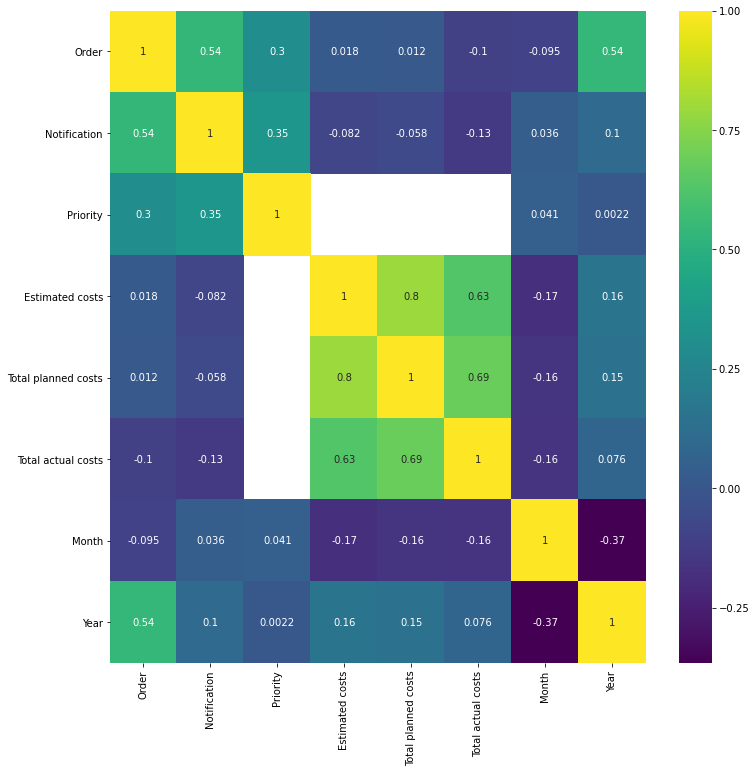

In [13]:
##IGNORE FOR NOW
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')